Seeing what I can do with stuff from here:

https://pytorch.org/tutorials/beginner/audio_preprocessing_tutorial.html#spectrogram

In [1]:
import math
from pathlib import Path

from IPython.display import Audio
import matplotlib.pyplot as plt
import torch
import torchaudio

/Users/robertdelisle/miniconda3/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(


In [2]:
AUDIO_DIR = Path('../audio')

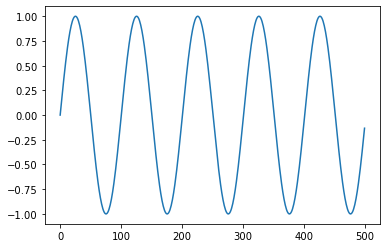

In [3]:
sine, _ = torchaudio.load(AUDIO_DIR / 'sine.wav')

plot_steps = 500
plt.plot(sine[0, :plot_steps])
plt.show()

Audio(AUDIO_DIR / 'sine.wav')

/Users/robertdelisle/miniconda3/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /tmp/pip-req-build-7w1l4mea/aten/src/ATen/native/SpectralOps.cpp:653.)
  return _VF.stft(input, n_fft, hop_length, win_length, window,  # type: ignore
/Users/robertdelisle/miniconda3/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: The function torch.rfft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.fft or torch.fft.rfft. (Triggered internally at  /tmp/pip-req-build-7w1l4mea/aten/src/ATen/native/SpectralOps.cpp:590.)
  return _VF.stft(input, n_fft, hop_length, win_length, window,  # type: ignore


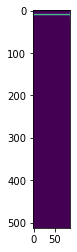

In [4]:
# define transformation
spectrogram = torchaudio.transforms.Spectrogram(
    n_fft=1024,
    win_length=None,
    hop_length=512,
    power=1.0,
)
# Perform transformation
spec = spectrogram(sine)

plt.imshow(spec[0])
# spec.shape

# Make a saw wave at 440 Hz, analyse

In [5]:
torchaudio.save?

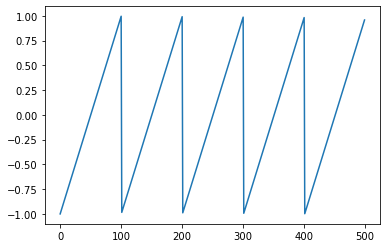

In [6]:
saw, _ = torchaudio.load(AUDIO_DIR / 'saw.wav')

plot_steps = 500
plt.plot(saw[0, :plot_steps])
plt.show()

Audio(AUDIO_DIR / 'saw.wav')

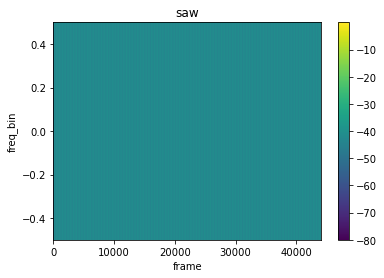

In [7]:
import librosa

def plot_spectrogram(spec, title=None, ylabel='freq_bin', aspect='auto', xmax=None):
  fig, axs = plt.subplots(1, 1)
  axs.set_title(title or 'Spectrogram (db)')
  axs.set_ylabel(ylabel)
  axs.set_xlabel('frame')
  im = axs.imshow(librosa.power_to_db(spec), origin='lower', aspect=aspect)
  if xmax:
    axs.set_xlim((0, xmax))
  fig.colorbar(im, ax=axs)
  plt.show(block=False)


plot_spectrogram(saw, title='saw')

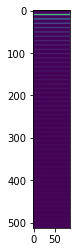

In [8]:
# Perform transformation
spec = spectrogram(saw)

plt.imshow(spec[0])
# spec.shape

In [12]:
saw.shape

torch.Size([1, 44100])

In [11]:
spec.shape

torch.Size([1, 513, 87])